In [6]:
import pandas as pd
import os

# 현재 파이썬 코드의 파일 경로
current_path = os.getcwd()  # 현재 작업 디렉토리를 가져옵니다.

# CSV 파일 경로
file_path = os.path.join(current_path, 'filtered_data.csv')  # User uploaded fioytle to this path

df = pd.read_csv(file_path)
df

,note_id,person_id,age,gender_source_value,BMI,admission_department,division,ward,asa_class,surgeon_id,...,condition_source_value,surgery_room,previous_surgery,emergency_status,op_timing,day_of_the_week,week_of_the_month,month,surgeon_estimated_op_time,surgery_duration
0,101058,29,81,F,25.247087,General Surgery,Admission,NUGW2,2,9885,...,D00002196,203,N,N,TF2,Thursday,4,October,130,66
1,57801,64,60,F,24.376249,Otolaryngology,Admission,102,2,6194,...,D00003798,504,N,N,8A,Friday,2,January,300,130
2,71288,64,60,F,24.376249,Otolaryngology,Admission,102,3,6194,...,D00003798,504,Y,N,TF4,Monday,4,April,100,85
3,135104,64,60,F,24.376249,Otolaryngology,Admission,102,3,6194,...,D00003798,504,Y,N,TF2,Monday,3,August,100,83
4,221210,71,94,M,27.963140,Orthopedics,Admission,41,2,29473,...,D00018711,108,N,N,TF4,Monday,5,March,100,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161214,297111,4055249,1,M,23.700428,Pediatric Surgery,Admission,5A,1,100613,...,D00011688,5,N,Y,etc,Tuesday,2,September,200,123
161215,297455,4055328,1,M,20.612160,Pediatric Urology,Day,PDSC,1,6259,...,D00016707,7,N,N,8A,Monday,4,September,130,45
161216,297761,4055407,1,M,12.502703,Pediatric Surgery,Admission,5A,2,105057,...,D00011524,5,N,N,8A,Wednesday,3,September,130,43
161217,297753,4055558,4,F,14.365794,Pediatric Surgery,Admission,5A,2,105057,...,D00004831,5,N,N,TF6,Wednesday,3,September,130,82


In [7]:
from sklearn.model_selection import train_test_split

# Removing unnecessary columns
df.drop(columns=['note_id', 'person_id', 'surgeon_estimated_op_time', 'final_op_name'], inplace=True)

# Encoding binary columns
binary_cols = ['condition_source_value', 'op_code', 'surgeon_id', 'ward', 'admission_department', 'surgery_room']
for col in binary_cols:
    df[col] = df[col].astype('category').cat.codes

# One-hot encoding for other categorical columns
one_hot_cols = ['surgical_department', 'op_timing', 'month', 'anesthesia_type', 
                'day_of_the_week', 'asa_class', 'week_of_the_month', 
                'division', 'previous_surgery', 'emergency_status', 'gender_source_value']
df_encoded = pd.get_dummies(df, columns=one_hot_cols)

# Splitting the data
X_all = df_encoded.drop("surgery_duration", axis=1)
y_all = df_encoded["surgery_duration"]
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

# Displaying the first few rows of the resulting dataframe
X_train_all
y_train_all


61344     122
137241     48
139478     76
113549     36
149411    127
         ... 
119879     76
103694     57
131932    311
146867     82
121958     57
Name: surgery_duration, Length: 128975, dtype: int64

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1347
[LightGBM] [Info] Number of data points in the train set: 128975, number of used features: 90
[LightGBM] [Info] Start training from score 136.030665


C:\Users\SNUH\AppData\Local\Temp\ipykernel_16664\2521253221.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(models.keys(), rotation=45)
C:\Users\SNUH\AppData\Local\Temp\ipykernel_16664\2521253221.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(models.keys(), rotation=45)
C:\Users\SNUH\AppData\Local\Temp\ipykernel_16664\2521253221.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(models.keys(), rotation=45)
C:\Users\SNUH\AppData\Local\Temp\ipykernel_16664\2521253221.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(models.keys(), rotation=45)


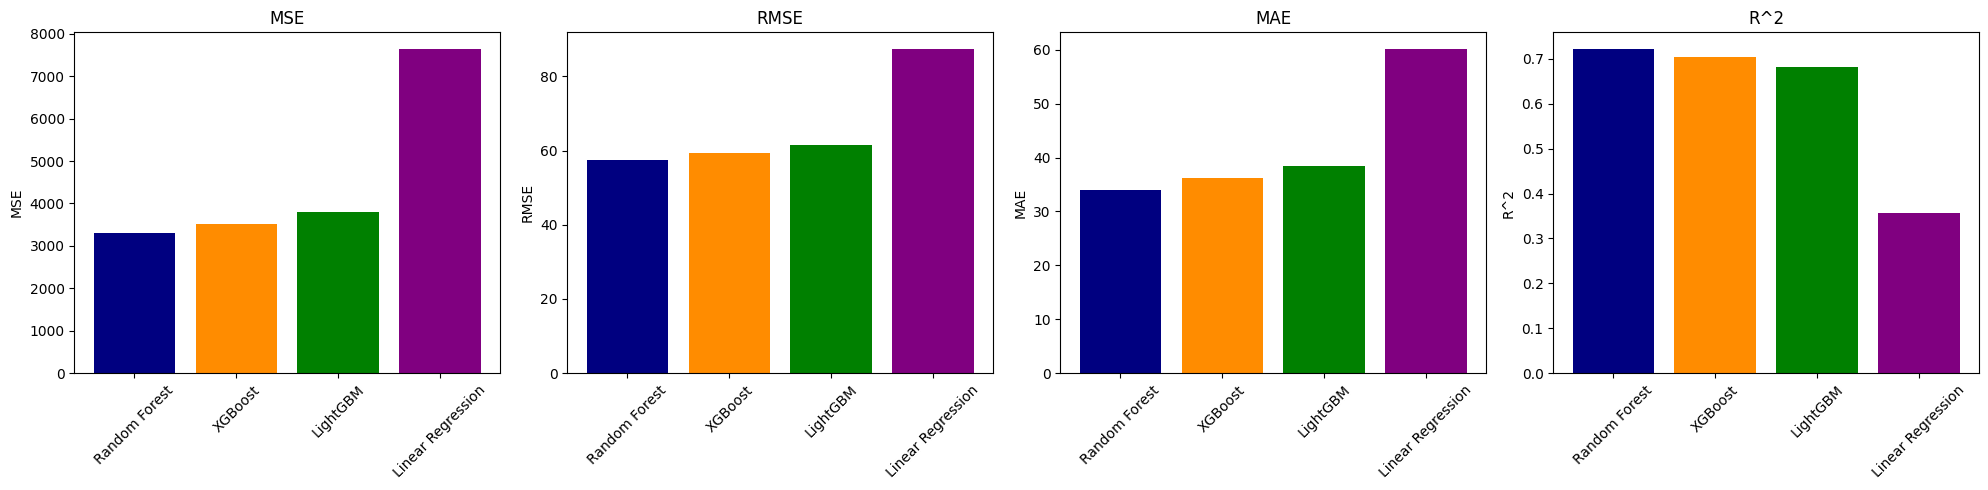

In [8]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Initialize models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    "Linear Regression": LinearRegression()
}

# Train each model and evaluate
model_results = {}
for name, model in models.items():
    # Training the model
    model.fit(X_train_all, y_train_all)
    
    # Making predictions on the test set
    y_pred = model.predict(X_test_all)
    
    # Calculating evaluation metrics
    mae = mean_absolute_error(y_test_all, y_pred)
    mse = mean_squared_error(y_test_all, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_all, y_pred)
    
    # Storing the results
    model_results[name] = {"MSE": mse, "RMSE": rmse, "R^2": r2, "MAE": mae}

# Convert results to DataFrame for easier visualization
results_df = pd.DataFrame(model_results).T
results_df

# Plotting the updated results
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # Adjusted for 4 subplots
metrics = ["MSE", "RMSE", "MAE", "R^2"]
colors = {"Random Forest": "navy", "XGBoost": "darkorange", "LightGBM": "green", "Linear Regression": "purple"}

for i, metric in enumerate(metrics):
    for model in models.keys():
        axes[i].bar(model, results_df.loc[model, metric], color=colors[model])
    axes[i].set_title(metric)
    axes[i].set_ylabel(metric)
    axes[i].set_xticklabels(models.keys(), rotation=45)

plt.tight_layout()
plt.show()


In [9]:
results_table = pd.DataFrame(model_results).T
results_table

,MSE,RMSE,R^2,MAE
Random Forest,3300.686943,57.451605,0.722866,34.046044
XGBoost,3517.460563,59.308183,0.704665,36.200433
LightGBM,3795.776755,61.609875,0.681297,38.366333
Linear Regression,7652.660793,87.479488,0.357462,60.208567


In [10]:

# 분과별 데이터셋 준비
departments = df['surgical_department'].unique()
models = {}
predictions = {}

# 각 분과별 모델 훈련
for dept in departments:
    # 열 이름 조정
    dept_col_name = 'surgical_department_' + dept

    # 분과별 데이터 필터링
    dept_data = df_encoded[df_encoded[dept_col_name] == 1]
    X_dept = dept_data.drop('surgery_duration', axis=1)
    y_dept = dept_data['surgery_duration']

    # 데이터 분할
    X_train_dept, X_test_dept, y_train_dept, y_test_dept = train_test_split(X_dept, y_dept, test_size=0.2, random_state=42)

    # 모델 훈련 (랜덤 포레스트 예시)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_dept, y_train_dept)
    models[dept] = model

    # 테스트 데이터셋에 대한 예측 수행
    predictions[dept] = model.predict(X_test_dept)

# 앙상블을 위한 준비
final_predictions = np.zeros(len(X_test_all))
test_indices = X_test_all.index

# 각 분과별 모델을 전체 테스트 데이터셋에 적용
for dept, model in models.items():
    # 열 이름 조정
    dept_col_name = 'surgical_department_' + dept

    # 해당 분과에 해당하는 테스트 데이터 인덱스
    dept_indices = X_test_all[X_test_all[dept_col_name] == 1].index

    # 해당 분과의 예측값 계산
    dept_predictions = model.predict(X_test_all.loc[dept_indices])

    # 최종 예측 배열에 해당 부분 업데이트
    final_predictions[np.isin(test_indices, dept_indices)] = dept_predictions

# 성능 평가
mae = mean_absolute_error(y_test_all, final_predictions)
rmse = np.sqrt(mean_squared_error(y_test_all, final_predictions))
r2 = r2_score(y_test_all, final_predictions)

print(f"Ensemble MAE: {mae}, RMSE: {rmse}, R²: {r2}")

Ensemble MAE: 16.67870301451433, RMSE: 31.662393537060968, R²: 0.9158268414503081


In [11]:
# 모델 초기화
model_classes = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    "Linear Regression": LinearRegression()
}

# 성능 결과를 저장할 딕셔너리
performance_results = {}

# 각 모델에 대해 반복
for model_name, model_class in model_classes.items():
    final_predictions = np.zeros(len(X_test_all))

    # 분과별 훈련 및 예측
    for dept in departments:
        dept_col_name = 'surgical_department_' + dept
        dept_data = df_encoded[df_encoded[dept_col_name] == 1]
        X_dept = dept_data.drop('surgery_duration', axis=1)
        y_dept = dept_data['surgery_duration']
        X_train_dept, X_test_dept, y_train_dept, y_test_dept = train_test_split(X_dept, y_dept, test_size=0.2, random_state=42)

        model = model_class
        model.fit(X_train_dept, y_train_dept)
        dept_indices = X_test_all[X_test_all[dept_col_name] == 1].index
        dept_predictions = model.predict(X_test_all.loc[dept_indices])
        final_predictions[np.isin(test_indices, dept_indices)] = dept_predictions

    # 성능 평가
    mae = mean_absolute_error(y_test_all, final_predictions)
    mse = mean_squared_error(y_test_all, final_predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_all, final_predictions)
    performance_results[model_name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R^2": r2}

# 결과를 DataFrame으로 변환 및 출력
performance_df = pd.DataFrame(performance_results).T
performance_df


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 29172, number of used features: 66
[LightGBM] [Info] Start training from score 156.203071
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 9417, number of used features: 58
[LightGBM] [Info] Start training from score 138.766380
[LightGBM] [Warning] Found

,MAE,MSE,RMSE,R^2
Random Forest,16.678703,1002.507164,31.662394,0.915827
XGBoost,22.601233,1392.036391,37.310004,0.883121
LightGBM,28.908992,2184.031787,46.733626,0.816623
Linear Regression,50.221122,5925.856013,76.979582,0.502449


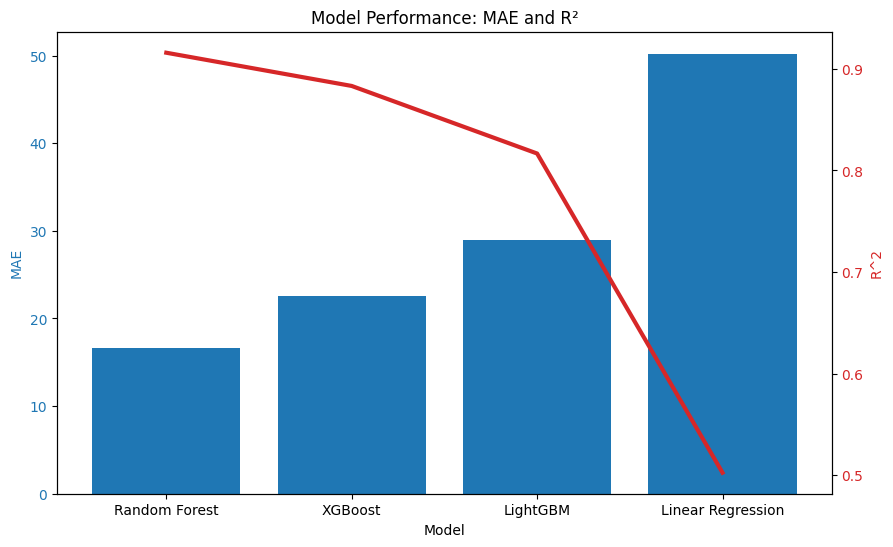

In [15]:
import matplotlib.pyplot as plt

# MAE와 R² 지표를 위한 그래프 생성
fig, ax1 = plt.subplots(figsize=(10, 6))

# MAE를 막대 그래프로 표시
color = 'tab:blue'
ax1.set_xlabel('Model')
ax1.set_ylabel('MAE', color=color)
ax1.bar(performance_df.index, performance_df['MAE'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# R²를 더 두꺼운 선 그래프로 표시하기 위한 새로운 축 생성
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('R^2', color=color)  
ax2.plot(performance_df.index, performance_df['R^2'], color=color, linewidth=3)
ax2.tick_params(axis='y', labelcolor=color)

# 제목 추가
plt.title('Model Performance: MAE and R²')

plt.show()
